In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
from src.grid import *

finish: 11943.3 ± 140.5 steps


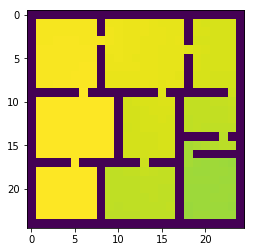

In [2]:
env = GridEnv(read_grid('grids/grid.png'), batch=4096)
visits = th.zeros(env.grid.size(), dtype=th.long)
finish_t = []
for _ in range(4096 * 4):
    pos, _, _, finish_times = env.step(th.randint(0, env.D * 2, size=(env.B,), dtype=th.long))
    for t in finish_times:
        finish_t.append(t)
    visits[pos[:, 0], pos[:, 1]] += 1
finish_t = th.tensor(finish_t, dtype=th.float32)
print('finish: {:.1f} ± {:.1f} steps'.format(finish_t.mean(), finish_t.std() / np.sqrt(finish_t.numel())))
plt.figure()
plt.imshow(visits)
plt.show()